In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import seaborn as sns

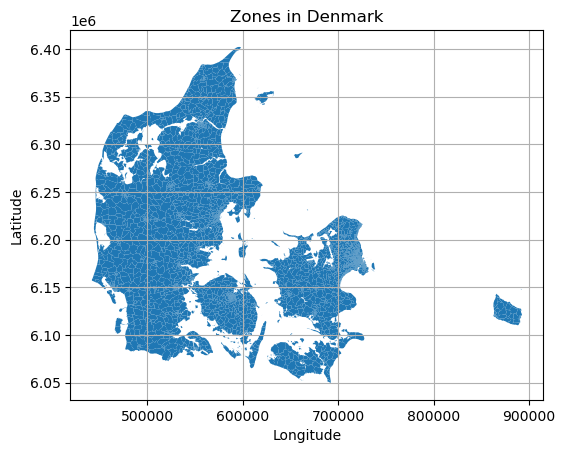

In [3]:
# Load the data
gdf = gpd.read_file('../data/raw/ltm_shapefiles/zones_level3.shp')

# Visualize the data
gdf.plot()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Zones in Denmark')
plt.grid(True)
plt.show()


In [4]:
gdf.head()

,OBJECTID,komnr,zoneid,zonenavn,zonedescri,numadresse,Shape_Leng,Shape_Area,geometry
0,794,760,760142,Borris,"Ringkøbing-Skjern Kommune, Sydøst",670,47170.786832,9.392093e+07,"POLYGON ((482065.500 6202415.410, 483132.330 6..."
1,795,760,760141,Troldhede,"Ringkøbing-Skjern Kommune, Sydøst",432,15619.978142,1.136408e+07,"POLYGON ((484178.401 6206641.664, 484168.180 6..."
2,796,825,825001,Østerby,Læsø Kommune,1157,46750.658885,2.084958e+07,"MULTIPOLYGON (((630129.060 6348955.780, 630138..."
3,1030,482,482013,Snøde,Langeland Kommune,492,18537.493622,1.719793e+07,"POLYGON ((623762.258 6107756.661, 623763.090 6..."
4,1031,482,482015,Tullebølle,Langeland Kommune,789,26069.391636,2.855963e+07,"POLYGON ((618300.281 6094390.702, 618507.508 6..."


In [5]:
# Explore unique names in 'zonenavn' column
unique_zone_names = gdf['zonenavn'].unique()

# Displaying unique names
print(unique_zone_names)


['Borris' 'Troldhede' 'Østerby' ... 'Høje Taastrup Station S' 'Fløng V'
 'Lyngby C+Vest NØ']


In [6]:
# check if "Saltholm"   is in the unique_zone_names
print("Kastrup" in unique_zone_names)

False


In [7]:
# Zones of interest based on user input
zone_names = ['Roskilde', 'Nordhavn', 'Gilleleje', 'Køge', "Kastrup"]

# Check for potential matches or similar names
similar_names = {zone: [] for zone in zone_names}
for original_zone in zone_names:
    for unique_name in unique_zone_names:
        if original_zone.lower() in unique_name.lower():
            similar_names[original_zone].append(unique_name)

# Displaying similar names
print(similar_names)


{'Roskilde': ['Roskilde C, Bypark, Roskilde Havn', 'Roskilde Sø, Roskilde Sygehus', 'Roskilde Ø, Himmelev Skole', 'Roskilde NV', 'Boserup Skov, Roskilde Golfklub', 'Roskilde C, Roskilde station', 'Vor Frue, Roskilde Festivalplads st.', 'Roskilde SV, Katedralskolen', 'Roskilde SV, Roskildehallerne', 'Roskilde Ø, Klostermarksskolen', 'Roskilde Ø, Ternevej', 'Roskilde Ø, Himmelev', 'Roskilde Ø, Himmelev Kirke', 'Roskilde Sø, Roskilde Sygehus, Station', 'Roskilde SØ, 10. klassecenter', 'Roskilde SØ, Hedegårdenes Skole', 'Roskilde V, Sct. Jørgensbjerg Kirke', 'Roskilde SV, Magretehåbsvej'], 'Nordhavn': ['Nordhavn indre kaj', 'Nordhavn Station', 'Nordhavn midter kaj', 'Nordhavn ydre kaj', 'Nordhavn S', 'Nordhavn N', 'Nordhavn Midt'], 'Gilleleje': ['Gilleleje Ø, Stæremose st.', 'Gilleleje station', 'Gilleleje, Fjellenstrup st.', 'Gilleleje øst station'], 'Køge': ['Køge Nord NV', 'Køge Syd Midt', 'Køge Syd Ø', 'Ringsted C, Køgevej', 'Køge Nord NØ', 'Køge by NV', 'Køge Nord S', 'Køge Syd S', 'K

In [8]:
# Extracting all similar names found
all_similar_names = [name for sublist in similar_names.values() for name in sublist]

# Extracting the specific zones
zones_of_interest = gdf[gdf['zonenavn'].isin(all_similar_names)]

# Extracting bounding box coordinates from the zones of interest
minx = zones_of_interest.bounds.minx.min()
miny = zones_of_interest.bounds.miny.min()
maxx = zones_of_interest.bounds.maxx.max()
maxy = zones_of_interest.bounds.maxy.max()

# Displaying bounding box coordinates
print(f"Bounding Box Coordinates:\nMinx: {minx}, Miny: {miny}, Maxx: {maxx}, Maxy: {maxy}")


Bounding Box Coordinates:
Minx: 676848.2052999996, Miny: 6147133.619000001, Maxx: 738936.2599999998, Maxy: 6225468.93


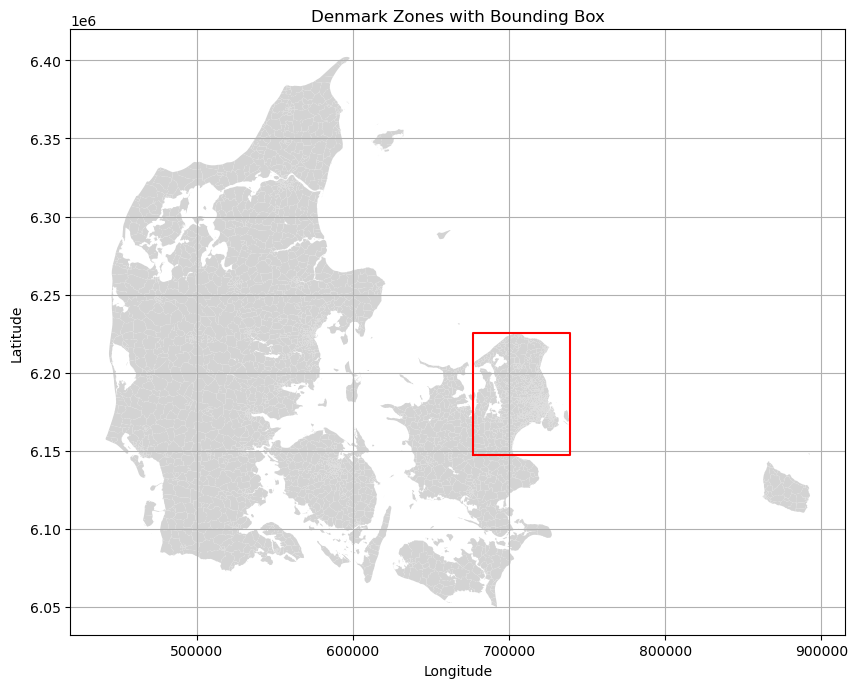

In [9]:
# Determine the bounding box coordinates
minx, miny, maxx, maxy = 676848.205, 6147133.619, 738936.259, 6225468.930

# Visualizing the bounding box along with the zones
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightgrey')
plt.plot([minx, maxx, maxx, minx, minx], [miny, miny, maxy, maxy, miny], color='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Denmark Zones with Bounding Box')
plt.grid(True)
plt.show()


In [10]:
# Creating a bounding box geometry
bbox_geom = box(minx, miny, maxx, maxy)

# Spatial filtering: Selecting zones that intersect with the bounding box
cop_area = gdf[gdf['geometry'].intersects(bbox_geom)]

# Displaying the first few rows of the filtered GeoDataFrame
print(cop_area.head())


     OBJECTID  komnr  zoneid           zonenavn          zonedescri  \
355      6585    153  153035  Brøndby Strand NV     Brøndby Kommune   
356      6586    153  153033  Brøndby Strand SV     Brøndby Kommune   
357      6588    187  187011       Vallensbæk S  Vallensbæk Kommune   
358      6589    153  153021    Brøndbyvester S     Brøndby Kommune   
359      6590    153  153024  Brøndbyvester NNØ     Brøndby Kommune   

     numadresse   Shape_Leng    Shape_Area  \
355         469  5881.304215  6.368232e+05   
356         567  4178.555401  8.232537e+05   
357         805  7083.711295  1.352975e+06   
358        1116  8278.683910  3.304261e+06   
359         598  3947.614780  6.585726e+05   

                                              geometry  
355  MULTIPOLYGON (((717065.090 6167793.410, 717080...  
356  POLYGON ((714912.062 6169465.885, 714940.877 6...  
357  POLYGON ((714253.370 6168940.880, 714265.630 6...  
358  POLYGON ((715846.736 6170548.621, 715502.058 6...  
359  POLYGO

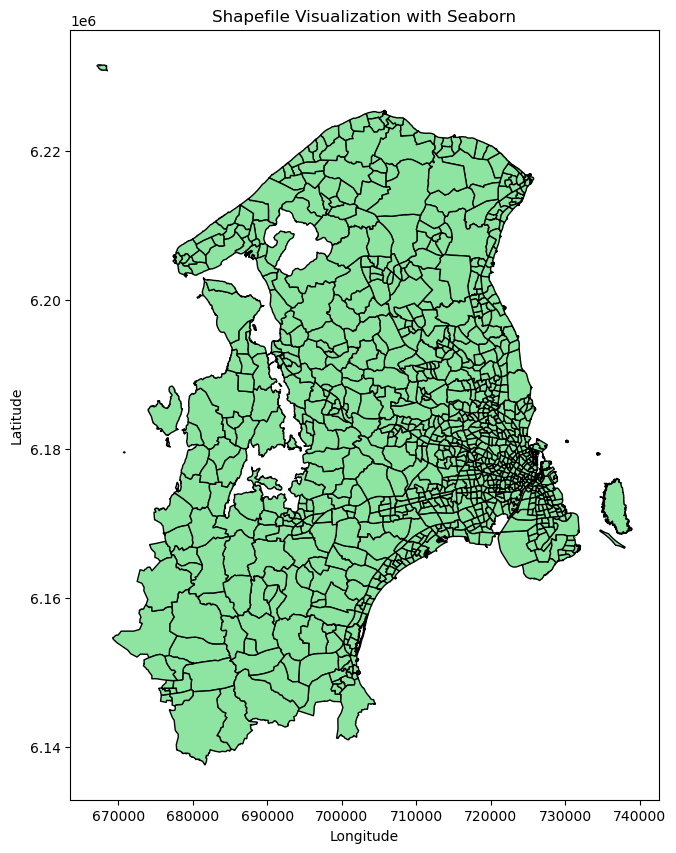

In [11]:
# Plot the shapefile using a Seaborn color palette
fig, ax = plt.subplots(figsize=(10, 10))
cop_area.plot(ax=ax, color=sns.color_palette("pastel")[2], edgecolor='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Shapefile Visualization with Seaborn')
plt.show()


In [12]:
# convert minx, miny, maxx, maxy to actual coordinates
from pyproj import Proj, transform

inProj = Proj(init='epsg:25832')
outProj = Proj(init='epsg:4326')
minx, miny = transform(inProj, outProj, minx, miny)
maxx, maxy = transform(inProj, outProj, maxx, maxy)


C:\Users\mihai\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\mihai\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\mihai\AppData\Local\Temp\ipykernel_6036\827087586.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-py

In [15]:
# Displaying bounding box coordinates
print(f"Bounding Box Coordinates:\nMinx: {minx}, Miny: {miny}, Maxx: {maxx}, Maxy: {maxy}")


Bounding Box Coordinates:
Minx: 11.795567590870476, Miny: 55.438414325467335, Maxx: 12.843531176748721, Maxy: 56.114397772504546


In [13]:
# save cop_area to a csv file in the data/processed folder
cop_area.to_csv('../data/processed/cop_area.csv', index=False)


In [14]:
# save cop_area to a shapefile in the data/processed folder
cop_area.to_file('../data/processed/cop_area.shp')